## Setup

In [140]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ipywidgets as widgets
import matplotlib.pyplot as plt

pio.templates.default = "seaborn"
pd.options.plotting.backend = "plotly"
pio.templates["seaborn"].layout.colorway = px.colors.qualitative.D3

%matplotlib inline

In [141]:
%store -r df

In [142]:
%run global.ipynb

In [143]:
#df['hour'] = [int(i) for i in df.hour]
#df.sort_values(['hour'], ascending = [True], inplace = True)

In [144]:
data = df[df['period'] != 'none']
# data.groupby(['hour','series', 'period']).median().unstack('series')['steps']
np.sqrt(data.groupby(['id', 'hour', 'series'])['steps'].mean().groupby(['hour', 'series']).var().groupby(['hour']).mean())

hour
00    133.410445
01    108.635435
02    179.770899
03     59.075405
04     65.562434
05    151.934039
06    317.612287
07    444.843829
08    425.354721
09    325.783318
10    356.739086
11    468.322627
12    495.817279
13    384.352611
14    355.625975
15    356.358114
16    400.454544
17    441.872542
18    426.588444
19    327.760318
20    285.211305
21    228.325789
22    242.173719
23    215.947300
Name: steps, dtype: float64

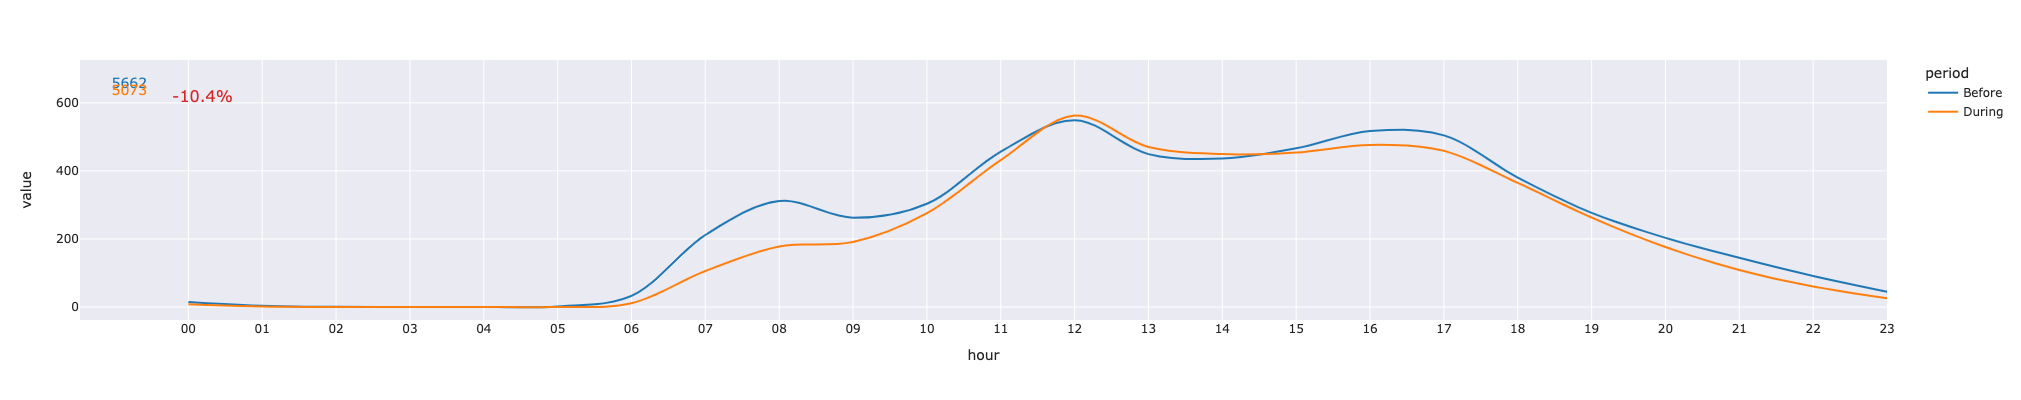

In [145]:
data = df[df['period'] != 'none']
steps = data.groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['hour', 'period']).sum().unstack('period')[0]
stepsBefore = steps['Before'].sum()
stepsAfter = steps['During'].sum()
fig = steps.plot.line(markers=False, line_shape='spline', color="period", height=400)

annotate_diff(fig, 0, 600, 40, '', stepsBefore, stepsAfter)
fig.show()

## Day for age ranges

In [146]:
age_ranges = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']

figs = []
m = 25
for age_range in age_ranges:
    data = df[df['period'] != 'none']
    steps = data[data['ageRange'] == age_range].groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['hour', 'period']).sum().unstack('period')[0]
    # std = np.sqrt(data[data['ageRange'] == age_range].groupby(['hour','series', 'period']).var().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['hour', 'period']).sum().unstack('period')[0])
    # upper = steps - std * 2
    # lower = steps + std * 2
    fig = steps.plot.line(markers=False, line_shape='spline', color="period", width=500, height=250, title=format_title(age_range))
    
    stepsBefore = steps['Before'].sum()
    stepsAfter = steps['During'].sum()
    
    fig.update_layout(annotations=[], overwrite=True)
    fig.update_layout(showlegend=False, margin=dict(t=m,l=m,b=m,r=m))
    fig.update_layout(xaxis = dict(
        tickvals = [0,6,12,18,23],
        ticktext = ['00:00', '06:00', '12:00', '18:00', '23:00']
    ), yaxis_title=None, xaxis_title=None)
    annotate_diff(fig, 0, 2000 if age_range == '85-94' else 580, 200 if age_range == '85-94' else 50, '', stepsBefore, stepsAfter)
    style_plot(fig)
    
    figs.append(go.FigureWidget(fig))
        
widgets.VBox([widgets.HBox([figs[0], figs[1], figs[2]]),widgets.HBox([figs[3], figs[4], figs[5]])])


    'data': [{'hovertemplate': 'period=Before<br>hour=%{x}<br>val…

In [147]:

figs = []
m = 25
data = df
steps = data.groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['hour', 'period']).sum().unstack('period')[0]
steps['Before'] = steps['During'] / steps['Before'].sum()
steps['During'] = steps['During'] / steps['During'].sum()
std = np.sqrt(data.groupby(['hour','series', 'period']).var().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['hour', 'period']).sum().unstack('period')[0])
    #upper = steps - std * 2
    #lower = steps + std * 2

upper = steps + std * 2
lower = steps - std * 2
fig = steps.plot.line(markers=False, line_shape='spline', color="period")
fig2 = upper.plot.line(markers=False, line_shape='spline', color="period")
fig3 = lower.plot.line(markers=False, line_shape='spline', color="period")
    
#fig.update_layout(annotations=[], overwrite=True)
#fig.update_layout(showlegend=False, margin=dict(t=m,l=m,b=m,r=m))
#fig.update_layout(xaxis = dict(
#    tickvals = [0,6,12,18,23],
#    ticktext = ['00:00', '06:00', '12:00', '18:00', '23:00']
#), yaxis_title=None, xaxis_title=None)
    
# figs.append(go.FigureWidget(fig))
        
    
steps
# widgets.VBox([widgets.HBox([figs[0], figs[1], figs[2]]),widgets.HBox([figs[3], figs[4], figs[5]]), widgets.HBox([figs[6], figs[7]])])
# fig.show()
#fig2.show()
#fig3.show()
#test
# fig, ax = plt.subplots()
#sns.lineplot(ax = ax,
#            data = test,
#             x = 'hour',
#             y = 'before')


period,Before,During
hour,,
00,0.001398,0.001561
01,0.000248,0.000277
02,0.000018,0.000020
03,0.000000,0.000000
04,0.000000,0.000000
05,0.000021,0.000024
06,0.001939,0.002164
07,0.018672,0.020839
08,0.031402,0.035046


In [148]:
std

period,Before,During
hour,,
00,120.290778,145.350688
01,145.085041,50.533615
02,234.345534,98.576481
03,76.505028,33.567657
04,78.779643,48.894103
05,165.669879,136.826151
06,258.737756,367.164681
07,384.188335,498.168031
08,376.269620,469.334050


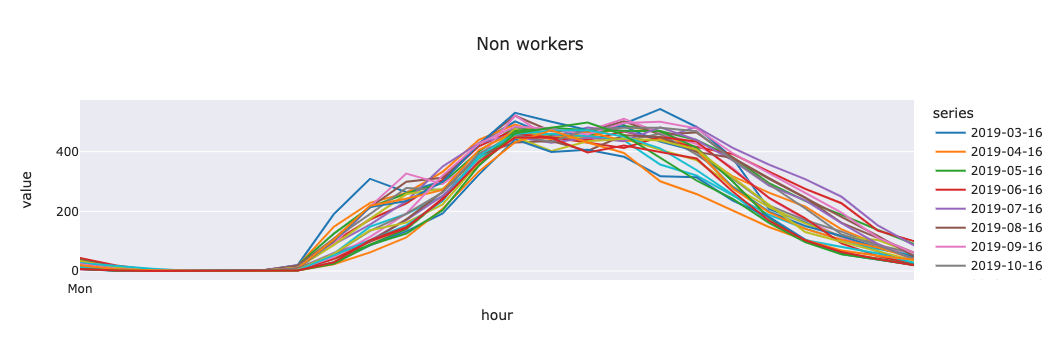

In [149]:
non_workers = df[df['work_age'] == False]
plot = (non_workers.groupby(['hour','series'])
   .median().unstack('series')['steps'].plot.line(title='Non workers', height=200))
plot.update_layout(xaxis = dict(
        tickmode = 'array',
        tickvals = [0,24, 48, 72, 96, 120, 144, 168],
        ticktext = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    ))

## Day breakdown for working age

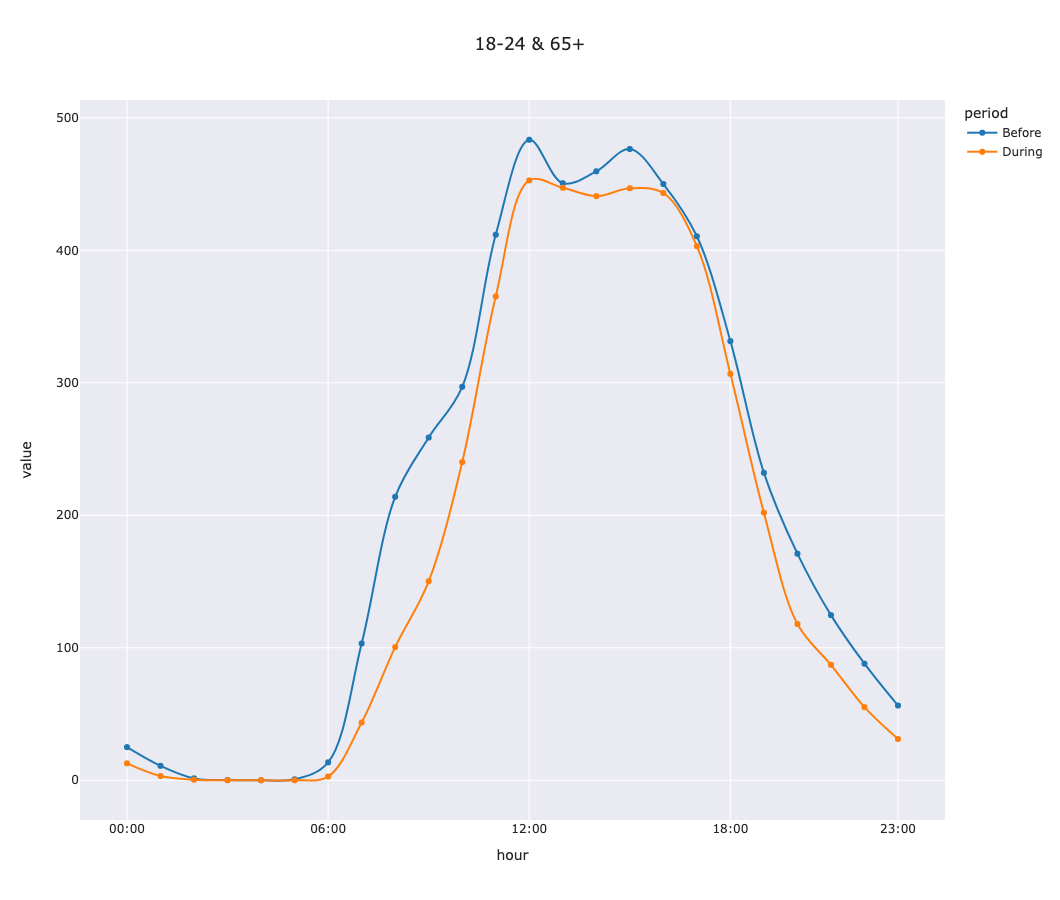

In [150]:
data = df[df['period'] != 'none']
workers = data[data['work_age'] == False]
steps = workers.groupby(['period','hour','series']).median().unstack('series')['steps'].median(axis=1).reset_index().groupby(['hour', 'period']).median().unstack('period')[0]

plot = steps.plot.line(title='18-24 & 65+', line_shape='spline', height=900, markers=True)
plot.update_layout(xaxis = dict(
        tickmode = 'array',
        tickvals = [0,6,12,18,23],
        ticktext = ['00:00', '06:00', '12:00', '18:00', '23:00']
    ))

In [151]:
periods = [{'from':5,'to':9,'label':'06:00 - 08:59'},{'from':9,'to':14,'label':'09:00 - 13:59'},{'from':14,'to':23,'label':'14:00 - 23:59'}]
for p in periods:
    middle = p['from'] + ((p['to'] - p['from']) / 2)
    stepsBefore = steps['Before'][p['from']:p['to'] + 1].sum()
    stepsAfter = steps['During'][p['from']:p['to'] + 1].sum()
    annotate_diff(plot, middle, 580, 20, p['label'], stepsBefore, stepsAfter)
    
    plot.add_vrect(x0=p['from'] + 0.05, x1=p['to'] - 0.05, opacity=0.15, layer="below", line_width=2, line_dash="dash")

annotateHourDiff(plot, steps, 8)

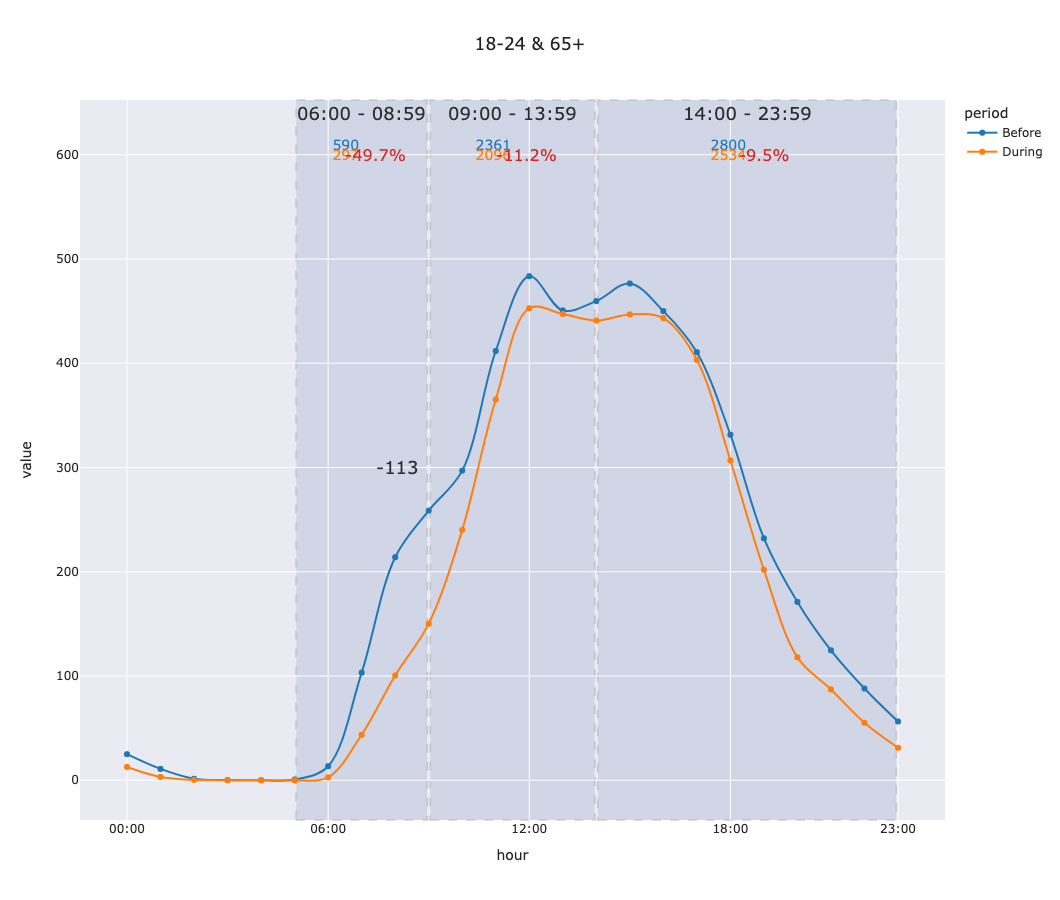

In [152]:
plot.show()